<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [1]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 466 kB 28.0 MB/s 
     |████████████████████████████████| 11.2 MB 52.0 MB/s 
     |████████████████████████████████| 9.8 MB 45.0 MB/s 
     |████████████████████████████████| 718 kB 53.4 MB/s 
     |████████████████████████████████| 930 kB 26.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639488 sha256=70d61f1ef98feeac77162fcbd225d0feb5e31e9d1d2521e58345f557543ebdce
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 6.6 MB 24.7 MB/s 
     |████████████████████████████████| 3.3 MB 54.3

In [2]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [3]:
# скачаем данные
!wget https://github.com/rishabh89007/Time_Series_Datasets/blob/main/Nuclear%20Capacity.csv?raw=true
!wget https://github.com/rishabh89007/Time_Series_Datasets/blob/main/Brent%20Spot%20Price.csv?raw=true

--2022-04-27 18:39:56--  https://github.com/rishabh89007/Time_Series_Datasets/blob/main/Nuclear%20Capacity.csv?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rishabh89007/Time_Series_Datasets/raw/main/Nuclear%20Capacity.csv [following]
--2022-04-27 18:39:56--  https://github.com/rishabh89007/Time_Series_Datasets/raw/main/Nuclear%20Capacity.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Nuclear%20Capacity.csv [following]
--2022-04-27 18:39:56--  https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Nuclear%20Capacity.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent

In [4]:
# считаем файлы
ts1 = pd.read_csv('Nuclear Capacity.csv?raw=true') #daily
ts2 = pd.read_csv('Brent Spot Price.csv?raw=true') #monthly

In [5]:
ts1.head()

,Unnamed: 0,"U.S. nuclear capacity, daily (Megawatts)"
0,2007 0101 01,101764.9
1,2007 0102 02,101764.9
2,2007 0103 03,101764.9
3,2007 0104 04,101764.9
4,2007 0105 05,101764.9


In [12]:
ts2.head()

,Unnamed: 0,"Brent crude oil spot price, Monthly (dollars per barrel)"
0,1990 01,21.251
1,1990 02,19.813
2,1990 03,18.387
3,1990 04,16.612
4,1990 05,16.352


In [14]:
a = '1990 01'
print(a[:4])

1990


In [6]:
def prepare_date_ts1(x):
  year = x[:4]
  month = x[5:7]
  day = x[-2:]
  date = year + ' ' + month + ' ' + day
  return pd.to_datetime(date, format= "%Y %m %d")

In [7]:
X1 = ts1['Unnamed: 0'].apply(lambda x: prepare_date_ts1(x))

In [8]:
def prepare_date_ts2(x):
  month = x[-3:]
  year = x[:4]
  date = year + ' ' + month + '1'
  return pd.to_datetime(date, format= "%Y %m %d")

In [9]:
X2 = ts2['Unnamed: 0'].apply(lambda x: prepare_date_ts2(x))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, ts1['U.S. nuclear capacity, daily (Megawatts)'], test_size = 0.2, shuffle= False)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, ts2['Brent crude oil spot price, Monthly (dollars per barrel)'], test_size = 0.2, shuffle= False)

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

In [32]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 25.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbit-ml 1.1.1 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


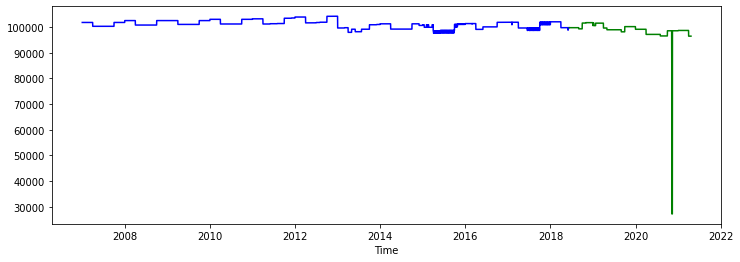

In [33]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(X1_train, y1_train, c = 'b')
plt.plot(X1_test, y1_test, c = 'g')
plt.xlabel('Time')
plt.show()

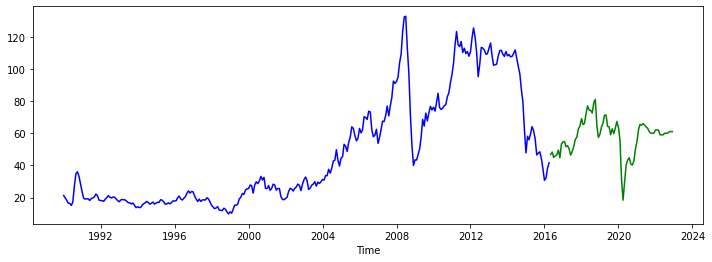

In [34]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(X2_train, y2_train, c = 'b')
plt.plot(X2_test, y2_test, c = 'g')
plt.xlabel('Time')
plt.show()

In [35]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')
from statsmodels.graphics.tsaplots import plot_acf

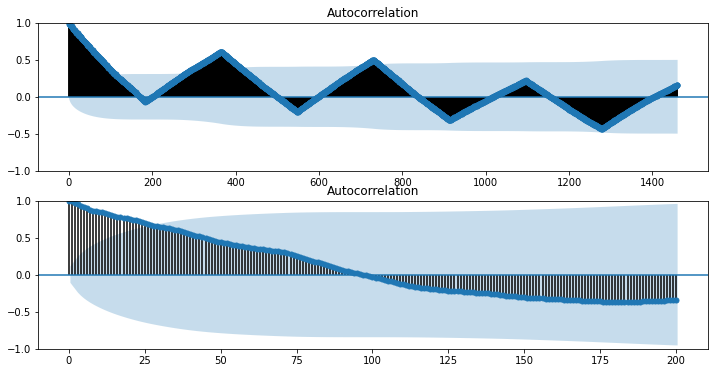

In [48]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(y1_train, ax=ax[0], lags=1460)
ax[1] = plot_acf(y2_train, ax=ax[1], lags=200)

В 1 датасета данных видна сезонность в 365 дней = 1 год.
Во втором сезонность не прослеживается.

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

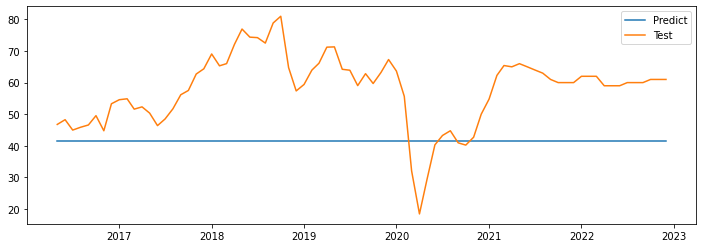

In [50]:
from sktime.forecasting.naive import NaiveForecaster

naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y2_train)
pred_last = naive_forecaster_last.predict(X2_test.index)

plt.figure(figsize=(12, 4))
plt.plot(X2_test, pred_last, label='Predict')
plt.plot(X2_test, y2_test, label='Test')
plt.legend()
plt.show()
# ваш код обучения моделей здесь

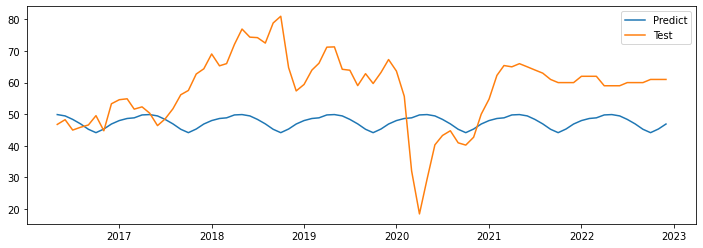

In [51]:
naive_forecaster_mean = NaiveForecaster(strategy="mean",  sp=12)
naive_forecaster_mean.fit(y2_train)
pred_mean = naive_forecaster_mean.predict(X2_test.index)

plt.figure(figsize=(12, 4))
plt.plot(X2_test, pred_mean, label='Predict')
plt.plot(X2_test, y2_test, label='Test')
plt.legend()
plt.show()

In [52]:
# посчитайте метрики на test
from sklearn.metrics import mean_absolute_error
print(f'MAE last = {mean_absolute_error(y2_test, pred_last)}')
print(f'MAE mean = {mean_absolute_error(y2_test, pred_mean)}')

MAE last = 17.49415
MAE mean = 13.033865598290594


### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


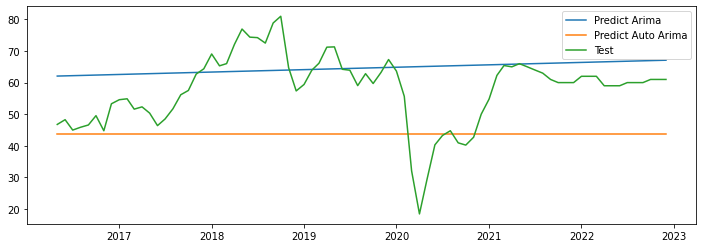

In [54]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

arima = ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
arima.fit(y2_train)
pred_arima = arima.predict(X2_test.index)

auto_arima = AutoARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
auto_arima.fit(y2_train)
pred_auto_arima = auto_arima.predict(X2_test.index)

plt.figure(figsize=(12, 4))
plt.plot(X2_test, pred_arima, label='Predict Arima')
plt.plot(X2_test, pred_auto_arima, label='Predict Auto Arima')
plt.plot(X2_test, y2_test, label='Test')
plt.legend()
plt.show()
# ваш код обучения моделей здесь

In [56]:
# посчитайте метрики на test
print(f'MAE arima = {mean_absolute_error(y2_test, pred_arima)}')
print(f'MAE auto_arima = {mean_absolute_error(y2_test, pred_auto_arima)}')

MAE arima = 9.580170792913739
MAE auto_arima = 15.705182109720289


### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

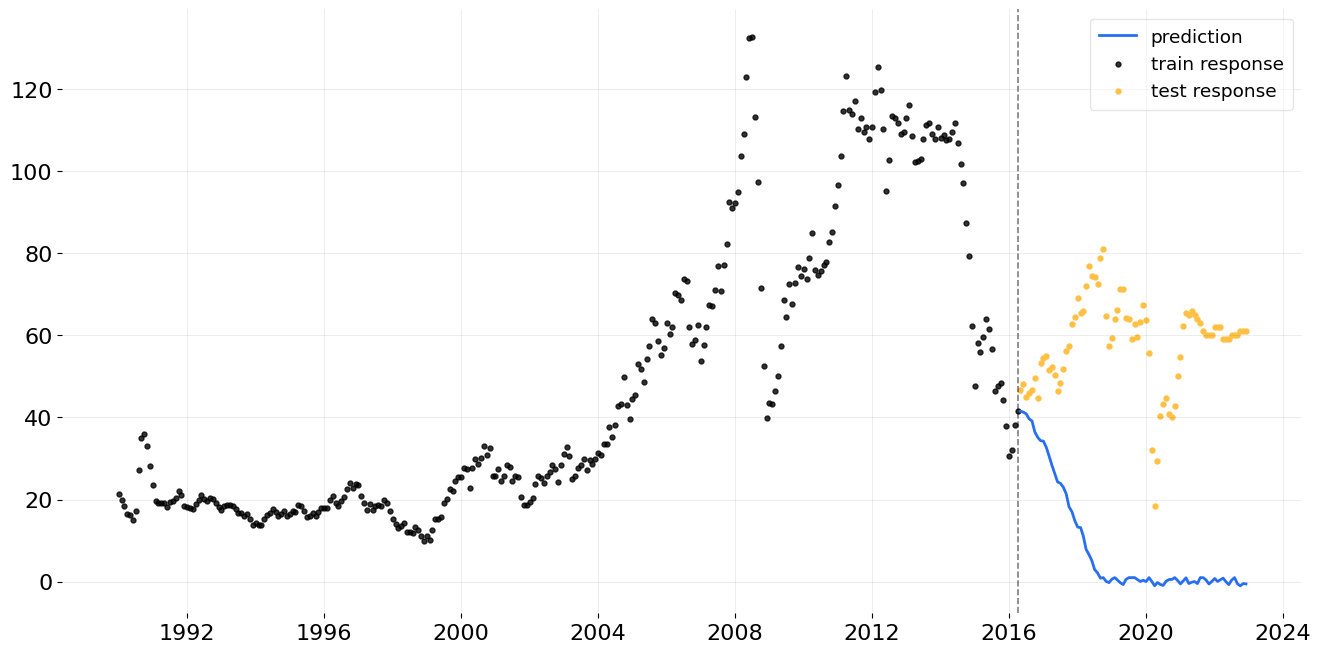

In [74]:
from orbit.models import LGT
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['week'] = X2_train
train_df['claims'] = y2_train
test_df['week'] = X2_test
test_df['claims'] = y2_test

lgt = LGT(
    response_col='claims',
    date_col='week',
    estimator='stan-map',
    seasonality=316,
    seed=8888,
)

lgt.fit(df=train_df)

predicted_df = lgt.predict(df=test_df)

plot_predicted_data(
    training_actual_df=train_df, predicted_df=predicted_df,
    date_col=lgt.date_col, actual_col=lgt.response_col,
    test_actual_df=test_df
)
# ваш код обучения моделей здесь

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05ff738ef22ce2e8a332ce639cee65cf NOW.


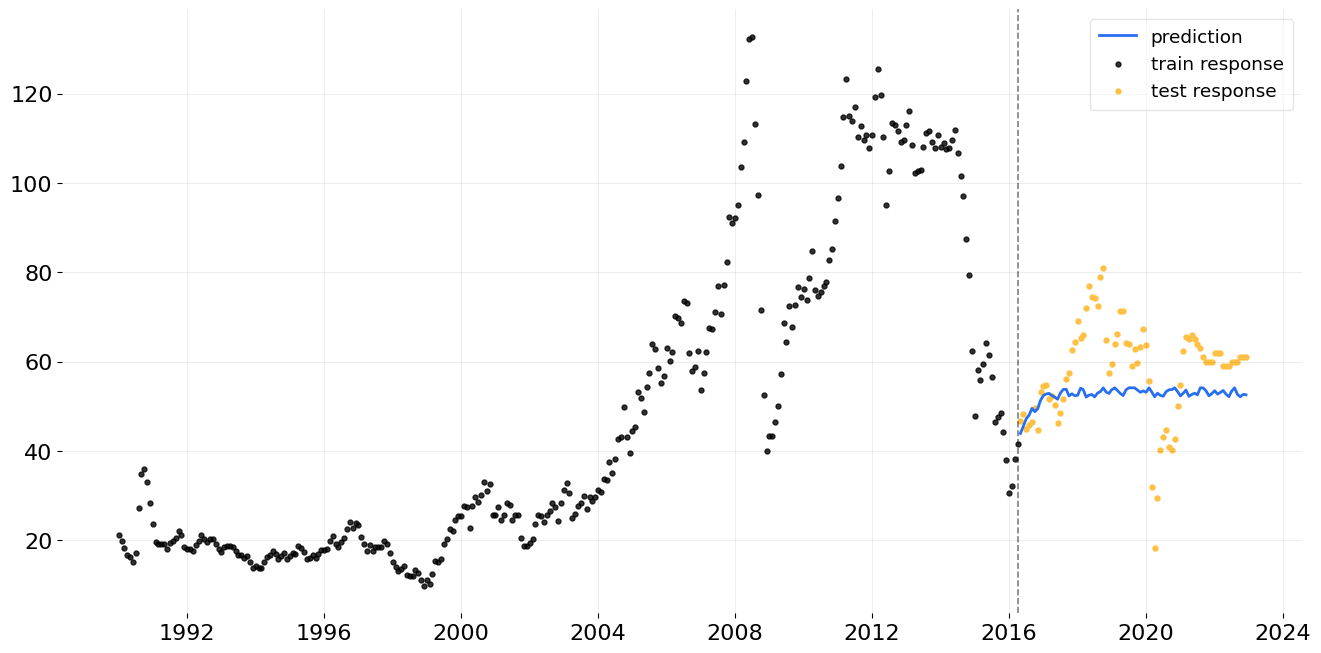

In [75]:
dlt = DLT(
    response_col='claims',
    date_col='week',
    estimator='stan-map',
    seasonality=316,
    seed=8888,
)

dlt.fit(df=train_df)

predicted_df_dlt = dlt.predict(df=test_df)

plot_predicted_data(
    training_actual_df=train_df, predicted_df=predicted_df_dlt,
    date_col=lgt.date_col, actual_col=lgt.response_col,
    test_actual_df=test_df
)

In [77]:
# посчитайте метрики на test
print(f"MAE lgt = {mean_absolute_error(y2_test, predicted_df['prediction'])}")
print(f"MAE dlt = {mean_absolute_error(y2_test, predicted_df_dlt['prediction'])}")

MAE lgt = 49.413847895364405
MAE dlt = 9.713530779784794


### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

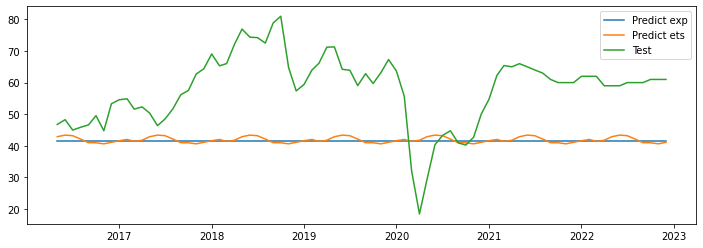

In [91]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

expSm = ExponentialSmoothing()
expSm.fit(y2_train)
expSm_pred = expSm.predict(X2_test.index)

ets = AutoETS(auto = True, sp = 12)
ets.fit(y2_train)
ets_pred = ets.predict(X2_test.index)

plt.figure(figsize=(12, 4))
plt.plot(X2_test, expSm_pred, label='Predict exp')
plt.plot(X2_test, ets_pred, label='Predict ets')
plt.plot(X2_test, y2_test, label='Test')
plt.legend()
plt.show()
# ваш код обучения моделей здесь

In [92]:
# посчитайте метрики на test
print(f"MAE ExponentialSmoothing = {mean_absolute_error(y2_test, expSm_pred)}")
print(f"MAE AutoEts = {mean_absolute_error(y2_test, ets_pred)}")

MAE ExponentialSmoothing = 17.494150042722374
MAE AutoEts = 17.304640746899103


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

In [108]:
test_df.head()

,week,claims
316,2016-05-01,46.742
317,2016-06-01,48.247
318,2016-07-01,44.952
319,2016-08-01,45.843
320,2016-09-01,46.568


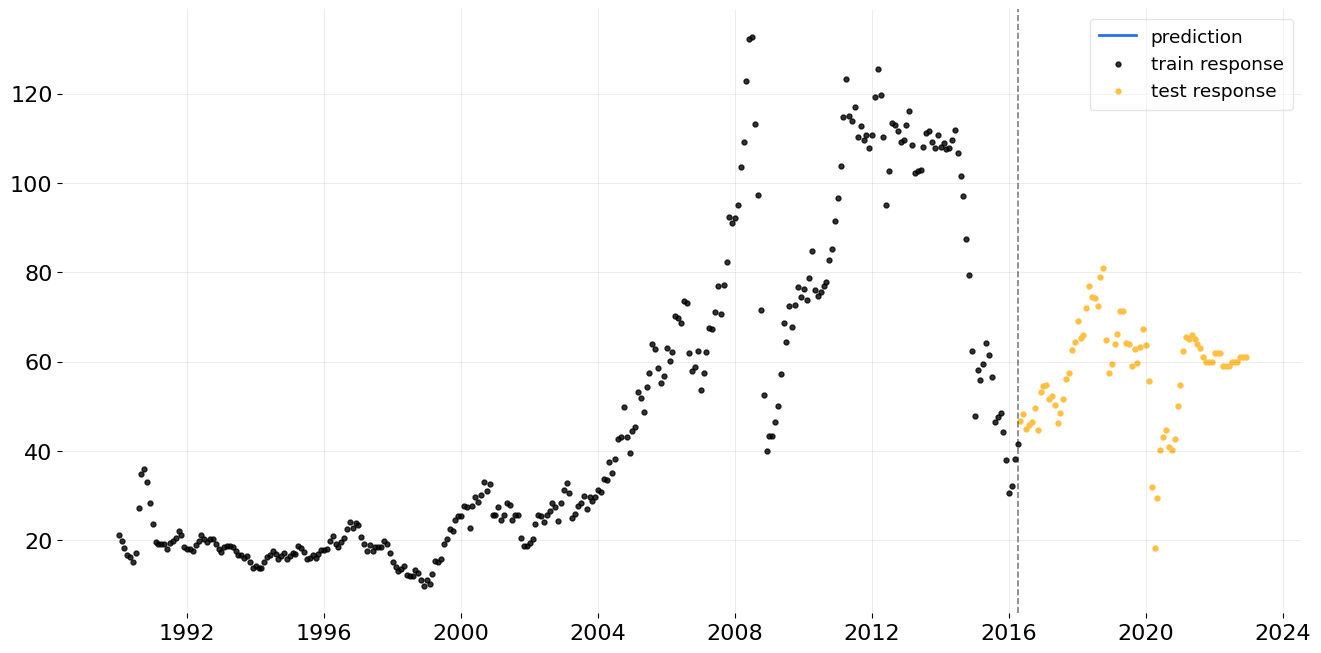

In [119]:
# нарисуйте пресказания
from orbit.diagnostics.plot import plot_predicted_data

predicted = pd.DataFrame()
predicted_df['prediction'] = pred_arima

test_df = pd.DataFrame()
test_df['claims'] = y2_test
test_df['week'] = X2_test

plot_predicted_data(
    training_actual_df=train_df, predicted_df=predicted_df,
    date_col=lgt.date_col, actual_col=lgt.response_col,
    test_actual_df=test_df
)

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

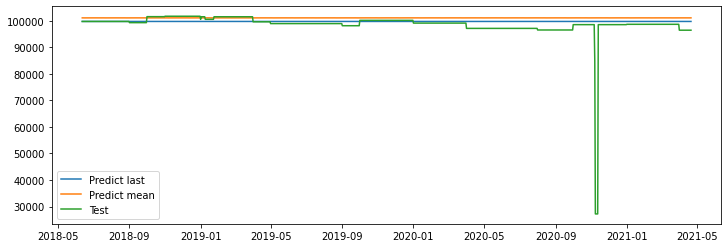

In [121]:
from sktime.forecasting.naive import NaiveForecaster

naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y1_train)
pred_last = naive_forecaster_last.predict(X1_test.index)

naive_forecaster_mean = NaiveForecaster(strategy="mean",  sp=12)
naive_forecaster_mean.fit(y1_train)
pred_mean = naive_forecaster_mean.predict(X1_test.index)

plt.figure(figsize=(12, 4))
plt.plot(X1_test, pred_last, label='Predict last')
plt.plot(X1_test, pred_mean, label='Predict mean')
plt.plot(X1_test, y1_test, label='Test')
plt.legend()
plt.show()

In [123]:
# посчитайте метрики на test
print(f'MAE last = {mean_absolute_error(y1_test, pred_last)}')
print(f'MAE mean = {mean_absolute_error(y1_test, pred_mean)}')

MAE last = 1665.9701435406728
MAE mean = 2487.7629057643885


### KTR из orbit (1 балл).



INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce583eb84b35032d795f7056cd3c761e NOW.


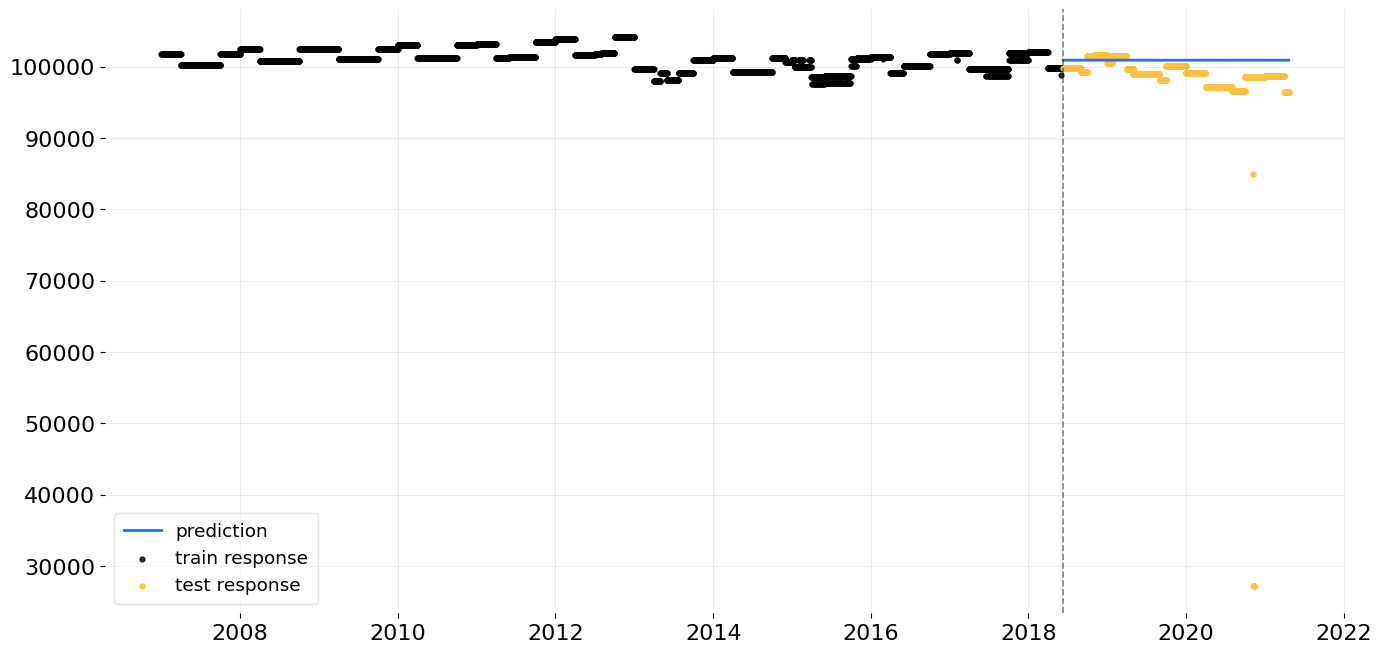

In [124]:
from orbit.models import KTRLite

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['week'] = X1_train
train_df['claims'] = y1_train
test_df['week'] = X1_test
test_df['claims'] = y1_test

ktr = KTRLite(
    response_col='claims',
    date_col='week',
    estimator='stan-map',
    seasonality=316,
    seed=8888,
)

ktr.fit(df=train_df)

predicted_df = ktr.predict(df=test_df)

plot_predicted_data(
    training_actual_df=train_df, predicted_df=predicted_df,
    date_col=ktr.date_col, actual_col=ktr.response_col,
    test_actual_df=test_df
)
# ваш код обучения моделей здесь

In [125]:
# посчитайте метрики на test
print(f"MAE ktr = {mean_absolute_error(y1_test, predicted_df['prediction'])}")

MAE ktr = 2364.6544427414874


### Phophet (1 балл).



In [129]:
from prophet import Prophet
train_df['ds'] = train_df['week']
train_df['y'] = train_df['claims']
model = Prophet(interval_width=0.9)
model.fit(train_df)
future_dataframe = model.make_future_dataframe(periods=1045)
pred_prophnet = model.predict(future_dataframe)
# ваш код обучения моделей здесь

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
# посчитайте метрики на test
print(f"MAE proph: {mean_absolute_error(y1_test, pred_prophnet.iloc[-1045:, :]['yhat'])}")

MAE proph: 2110.629616647372


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

In [ ]:
# нарисуйте пресказания

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [13]:
# обучите классические модели ML
def create_dataset(x):
  dataset = pd.DataFrame()
  dataset['month'] = x['Unnamed: 0'].apply(lambda x: int(x[-3:]))
  dataset['year'] = x['Unnamed: 0'].apply(lambda x: int(x[:4]))
  return dataset

In [17]:
dataset = create_dataset(ts2)
dataset.head()
target = pd.DataFrame()
target['target'] = ts2['Brent crude oil spot price, Monthly (dollars per barrel)']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size = 0.2, shuffle= False)

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error
print(f'MAE lin reg = {mean_absolute_error(y_test, reg.predict(X_test))}')

MAE lin reg = 49.89580136845291


In [21]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error
print(f'MAE dec tree = {mean_absolute_error(y_test, regressor.predict(X_test))}')

MAE dec tree = 19.1841


In [23]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)
print(f'MAE lin reg = {mean_absolute_error(y_test, regr.predict(X_test))}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MAE lin reg = 8.505257365538379


Лучше всего справился случайный лес. Использовались модели: линейный регрессор, решающее дерево, случайный лес.

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания